In [207]:
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
plt.rcParams['figure.figsize'] = [9, 9]

Pixel coordinate at University of Arizona is (258.0,63.4)

Use pd dataframe for time series data with each sensor location.
Separating by forecast time? Or keep all in one pandas dataframe.
Subtraction with truth works well.
Consider max and mean threshold across field for different days in order to
differentiate cloudy days for plots

In [236]:
data_files = glob('data_crop*.nc')
data_sample = data_files[0]
res_files = glob('20140402*Z.nc')
res_sample = res_files[0]
print(data_files)
print(res_sample,data_sample)
print(res_files)

['data_crop_04_02.nc', 'data_crop_04_05.nc', 'data_crop_04_09.nc', 'data_crop_04_10.nc', 'data_crop_04_11.nc', 'data_crop_04_12.nc', 'data_crop_04_15.nc', 'data_crop_04_18.nc', 'data_crop_04_19.nc', 'data_crop_04_20.nc', 'data_crop_04_21.nc', 'data_crop_04_22.nc', 'data_crop_04_25.nc', 'data_crop_04_26.nc', 'data_crop_05_05.nc', 'data_crop_05_06.nc', 'data_crop_05_07.nc', 'data_crop_05_08.nc', 'data_crop_05_09.nc', 'data_crop_05_19.nc', 'data_crop_05_20.nc', 'data_crop_05_21.nc', 'data_crop_05_22.nc', 'data_crop_05_23.nc', 'data_crop_05_24.nc', 'data_crop_05_25.nc', 'data_crop_05_29.nc', 'data_crop_05_30.nc', 'data_crop_06_03.nc', 'data_crop_06_10.nc', 'data_crop_06_11.nc', 'data_crop_06_12.nc', 'data_crop_06_14.nc', 'data_crop_06_15.nc', 'data_crop_06_16.nc', 'data_crop_06_17.nc', 'data_crop_06_18.nc', 'data_crop_06_19.nc', 'data_crop_06_22.nc']
20140402_1630Z.nc data_crop_04_02.nc
['20140402_1630Z.nc', '20140402_1645Z.nc', '20140402_1700Z.nc', '20140402_1715Z.nc', '20140402_1730Z.nc'

In [121]:
data_ds = xr.open_dataset(data_sample)
data_ci_all = data_ds.data_vars['ci']
ci_values = data_ci_all.sel(west_east=258, south_north=63.5).values
ci_times = data_ci_all.time.values
data_ci = dict(zip(ci_times,ci_values))
data_ci

{numpy.datetime64('2014-04-02T16:30:00.000000000'): 0.03733063654703432,
 numpy.datetime64('2014-04-02T16:45:00.000000000'): 0.030871619581483437,
 numpy.datetime64('2014-04-02T17:00:00.000000000'): 0.024844708568645693,
 numpy.datetime64('2014-04-02T17:15:00.000000000'): 0.03570202236129997,
 numpy.datetime64('2014-04-02T17:30:00.000000000'): 0.03926638592201359,
 numpy.datetime64('2014-04-02T17:45:00.000000000'): 0.05158598930850311,
 numpy.datetime64('2014-04-02T18:00:00.000000000'): 0.12852202440228605,
 numpy.datetime64('2014-04-02T18:30:00.000000000'): 0.09737220744266575,
 numpy.datetime64('2014-04-02T18:45:00.000000000'): 0.11287500060494923,
 numpy.datetime64('2014-04-02T19:00:00.000000000'): 0.052289637699739794,
 numpy.datetime64('2014-04-02T19:15:00.000000000'): 0.08243610070284821,
 numpy.datetime64('2014-04-02T19:30:00.000000000'): 0.11768962988863818,
 numpy.datetime64('2014-04-02T19:45:00.000000000'): 0.1539219529349478,
 numpy.datetime64('2014-04-02T20:00:00.000000000'

In [151]:
res_sample = res_files[0]
res_ds = xr.open_dataset(res_sample)
res_ci_all_arr = res_ds.data_vars['ci']
res_ci_arr = res_ci_all_arr.sel(west_east=258, south_north=63.5)
res_ci_arr = res_ci_arr.isel(time=slice(1,5))
print(res_ci_arr)
res_ci = res_ci_arr.values
res_times = res_ci_arr.time.values
print(res_ci)

<xarray.DataArray 'ci' (time: 4, ensemble_number: 20)>
array([[2.951033e-01, 0.000000e+00, 2.808460e-03, 2.339006e-01, 0.000000e+00,
        4.199773e-01, 5.794519e-02, 7.725828e-03, 4.079556e-02, 3.734202e-04,
        5.733527e-03, 2.639292e-01, 1.383326e-01, 2.527930e-03, 3.911182e-01,
        3.180134e-01, 1.055006e-02, 3.438428e-01, 1.572442e-01, 4.634006e-01],
       [2.954715e-01, 1.206833e-02, 9.036553e-03, 2.532039e-01, 2.194063e-02,
        4.486544e-01, 9.977282e-03, 2.651097e-02, 6.461265e-02, 0.000000e+00,
        0.000000e+00, 2.580303e-01, 1.472660e-01, 1.477161e-02, 4.081059e-01,
        3.942691e-01, 2.355710e-02, 4.182176e-01, 2.077851e-01, 4.763157e-01],
       [2.797670e-01, 1.842366e-03, 6.586140e-02, 2.125259e-01, 8.535408e-02,
        4.809355e-01, 0.000000e+00, 4.273511e-02, 5.453430e-02, 1.378292e-02,
        0.000000e+00, 2.908291e-01, 1.665884e-01, 1.350210e-02, 4.248558e-01,
        2.681337e-01, 3.330937e-02, 3.823103e-01, 1.598935e-01, 4.793549e-01],
      

In [176]:
plot = [] 
for res_file in res_files:
    #res_file = res_sample
    res_ds = xr.open_dataset(res_file)
    res_ci_all_arr = res_ds.data_vars['ci']
    res_ci_arr = res_ci_all_arr.sel(west_east=258, south_north=63.5)
    res_ci_arr = res_ci_arr.isel(time=slice(1,5))
    res_ci = res_ci_arr.values
    res_times = res_ci_arr.time.values
    #print(res_ci[0])
    fc = []
    for j in range(4):
        #print(res_times[j])
        ci_avg = np.average(res_ci[j])
        #print(ci_avg)
        ci_std = np.std(res_ci[j])
        #print(ci_std)
        ci_obs = data_ci.get(res_times[j])
        #print(ci_obs)
        try:
            fc.append([ci_std,abs(ci_avg-ci_obs)])
        except:
            fc.append([None,None])
    #print(fc)
    plot.append(fc)
plot = np.array(plot)
plot = np.transpose(plot,(1,0,2))
print(plot)

[[[0.162302 0.1267944824702515]
  [0.0039777006 0.0031914661594164145]
  [0.0025254334 0.01144778785362003]
  [0.0046611605 0.00966542851346619]
  [0.004813721 0.012889234584715803]
  [0.005206594 0.09496284360613966]
  [None None]
  [0.007575158 0.05781892783340001]
  [0.01466843 0.0352701517194344]
  [0.02041941 0.013609723311033023]
  [0.045028802 0.0291229729889787]
  [0.05085914 0.010774976106372652]
  [0.05202508 0.047516998456620274]
  [0.027084872 0.05006988955910721]
  [0.008731709 0.025056194816859292]
  [None None]
  [None None]
  [0.004723501 0.00570486632703146]
  [0.007333527 0.02267261550353597]
  [0.0051912633 0.007714103129916994]
  [0.006656559 0.01837848299562525]
  [None None]]

 [[0.17399064 0.14964504288952235]
  [0.004288082 0.008605806725761868]
  [0.005343277 0.016237842703043293]
  [0.00445606 0.0260810724021463]
  [0.0048244605 0.10516610267188692]
  [None None]
  [0.02457153 0.001120683153724017]
  [0.01713602 0.01908253602681889]
  [0.01406246 0.01078504429

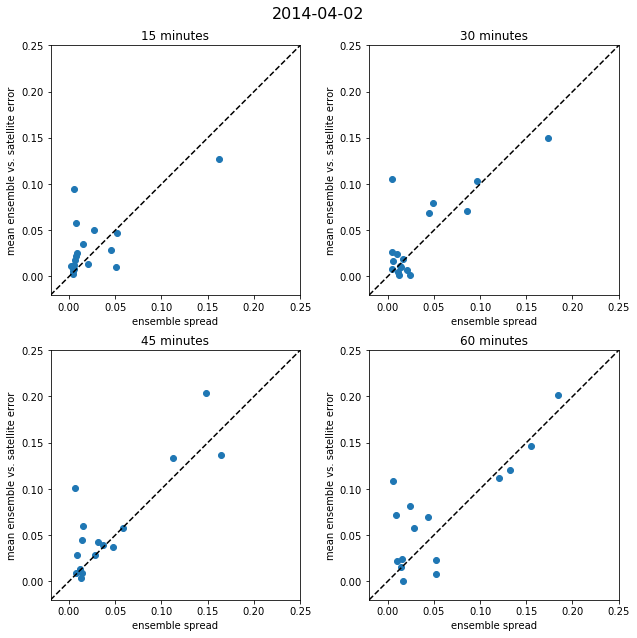

In [235]:
xmin = -0.02
ymin = xmin
xmax = 0.25
ymax = xmax
x = [xmin,xmax]
y = [ymin,ymax]
rows = 2; cols = 2;
fig,axarr = plt.subplots(rows,cols) 
for r in range(rows):
    for c in range(cols):
        axarr[r,c].set_aspect('equal','box')
        axarr[r,c].axis([xmin,xmax,ymin,ymax])
        axarr[r,c].plot(x,y,c='k',ls='--')
        axarr[r,c].set_xlabel("ensemble spread")
        axarr[r,c].set_ylabel("mean ensemble vs. satellite error")
axarr[0,0].scatter(plot[0,:,0],plot[0,:,1])
axarr[0,0].set_title("15 minutes")
axarr[0,1].scatter(plot[1,:,0],plot[1,:,1])
axarr[0,1].set_title("30 minutes")
axarr[1,0].scatter(plot[2,:,0],plot[2,:,1])
axarr[1,0].set_title("45 minutes")
axarr[1,1].scatter(plot[3,:,0],plot[3,:,1])
axarr[1,1].set_title("60 minutes")
fig.tight_layout()
fig.suptitle("2014-04-02",fontsize=16)
fig.subplots_adjust(top=0.92)
plt.show()

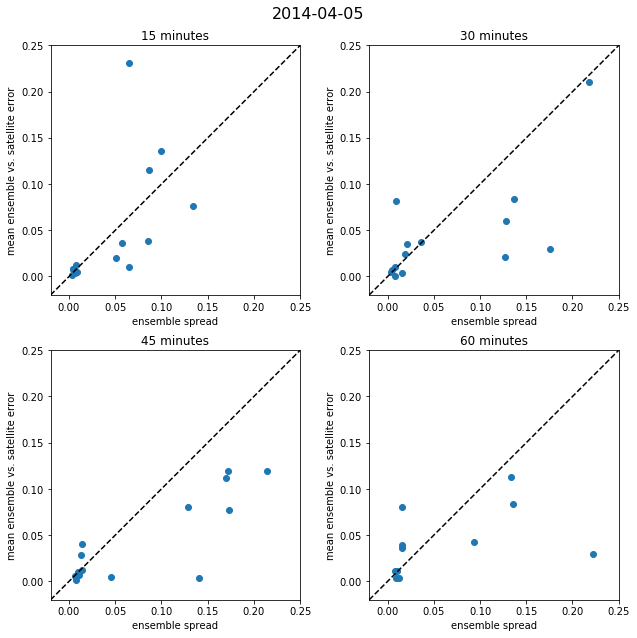

In [239]:
data_sample = 'data_crop_04_05.nc'
res_files = glob('20140405*Z.nc')
data_ds = xr.open_dataset(data_sample)
data_ci_all = data_ds.data_vars['ci']
ci_values = data_ci_all.sel(west_east=258, south_north=63.5).values
ci_times = data_ci_all.time.values
data_ci = dict(zip(ci_times,ci_values))

plot = [] 
for res_file in res_files:
    #res_file = res_sample
    res_ds = xr.open_dataset(res_file)
    res_ci_all_arr = res_ds.data_vars['ci']
    res_ci_arr = res_ci_all_arr.sel(west_east=258, south_north=63.5)
    res_ci_arr = res_ci_arr.isel(time=slice(1,5))
    res_ci = res_ci_arr.values
    res_times = res_ci_arr.time.values
    #print(res_ci[0])
    fc = []
    for j in range(4):
        #print(res_times[j])
        ci_avg = np.average(res_ci[j])
        #print(ci_avg)
        ci_std = np.std(res_ci[j])
        #print(ci_std)
        ci_obs = data_ci.get(res_times[j])
        #print(ci_obs)
        try:
            fc.append([ci_std,abs(ci_avg-ci_obs)])
        except:
            fc.append([None,None])
    #print(fc)
    plot.append(fc)
plot = np.array(plot)
plot = np.transpose(plot,(1,0,2))

xmin = -0.02
ymin = xmin
xmax = 0.25
ymax = xmax
x = [xmin,xmax]
y = [ymin,ymax]
rows = 2; cols = 2;
fig,axarr = plt.subplots(rows,cols) 
for r in range(rows):
    for c in range(cols):
        axarr[r,c].set_aspect('equal','box')
        axarr[r,c].axis([xmin,xmax,ymin,ymax])
        axarr[r,c].plot(x,y,c='k',ls='--')
        axarr[r,c].set_xlabel("ensemble spread")
        axarr[r,c].set_ylabel("mean ensemble vs. satellite error")
axarr[0,0].scatter(plot[0,:,0],plot[0,:,1])
axarr[0,0].set_title("15 minutes")
axarr[0,1].scatter(plot[1,:,0],plot[1,:,1])
axarr[0,1].set_title("30 minutes")
axarr[1,0].scatter(plot[2,:,0],plot[2,:,1])
axarr[1,0].set_title("45 minutes")
axarr[1,1].scatter(plot[3,:,0],plot[3,:,1])
axarr[1,1].set_title("60 minutes")
fig.tight_layout()
fig.suptitle("2014-04-05",fontsize=16)
fig.subplots_adjust(top=0.92)
plt.show()

In [225]:
test = [[[1,2],[3,4],[5,6],[7,8]],[[9,10],[11,12],[13,14],[15,16]]]
test = np.array(test)
test

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12],
        [13, 14],
        [15, 16]]])

In [117]:
np.ones((2,3,4))

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [141]:
test = np.transpose(test,(1,0,2))
test

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12],
        [13, 14],
        [15, 16]]])

In [143]:
test[0,:,0]

array([1, 3, 5, 7])